In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize

%matplotlib inline

kk = 4

In [2]:
data_poland = pd.read_csv('poland.csv')
data_italy = pd.read_csv('italy.csv')

data_poland.dropna(inplace = True)

day_poland = np.array(data_poland['day'])
deaths_poland = np.array(data_poland['n'])
delta_poland = np.array(data_poland['delta'])

day_italy = np.array(data_italy['day'])
deaths_italy = np.array(data_italy['n'])


In [3]:
data_poland

,day,n,delta,daydate,monthdate
0,1,1,1,4,3
1,2,1,0,5,3
2,3,5,4,6,3
3,4,6,1,7,3
4,5,11,5,8,3
5,6,17,6,9,3
6,7,22,5,10,3
7,8,31,9,11,3
8,9,51,20,12,3
9,10,68,17,13,3


In [4]:
def func_expo(x, a, b):
    return a * np.exp(b * x)

def func_logistic(x, x0, k, V):
    return V/(1+np.exp(k*(x-x0)))

def func_geometric(x,a,n):
    return a*x**n

In [5]:
popt, pcov = scipy.optimize.curve_fit(func_expo,  day_poland,  deaths_poland)
perr = np.sqrt(np.diag(pcov))

print("y = a * np.exp(b * x), a= {:2f} +- {:2f} b = {:2f} +- {:2f}".format( popt[0], perr[0],  popt[1], perr[1] )  )

y = a * np.exp(b * x), a= 69.122106 +- 6.937923 b = 0.123209 +- 0.003168


In [6]:
popt, pcov = scipy.optimize.curve_fit(func_logistic,  day_poland+kk,  deaths_poland)
perr = np.sqrt(np.diag(pcov))

print(" V/(1+np.exp(k*(x-x0)))  x0= {:2f} +- {:2f} k = {:2f} +- {:2f}  V = {:2f} +- {:2f}".format( popt[0], perr[0],  popt[1], perr[1], popt[2], perr[2] )  )

 V/(1+np.exp(k*(x-x0)))  x0= 37.247882 +- 0.563191 k = -0.177213 +- 0.004475  V = 8314.197351 +- 422.136895


In [7]:
poland_parameters_logistic = scipy.optimize.curve_fit(func_logistic,  day_poland+kk,  deaths_poland)[0]
poland_parameters_expo = scipy.optimize.curve_fit(func_expo,  day_poland,  deaths_poland)[0]

poland_parameters_logistic

array([ 3.72478821e+01, -1.77213019e-01,  8.31419735e+03])

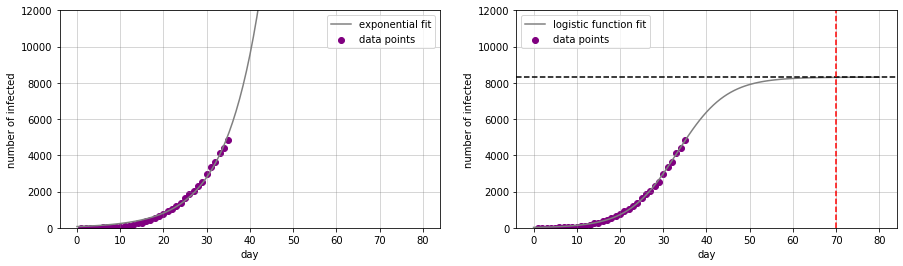

In [8]:
x = np.linspace(0,80,101)
max_y = 12000

a = poland_parameters_expo[0]
b = poland_parameters_expo[1]
y_expo = func_expo(x, a, b)

x0 = poland_parameters_logistic[0]
k = poland_parameters_logistic[1]
V = poland_parameters_logistic[2]

y_logistic = func_logistic(x+kk,x0,k,V)

fig, axs = plt.subplots(ncols=2, figsize = (15,4))


axs[0].scatter(day_poland, deaths_poland, label="data points", color = "purple")
axs[0].plot(x, y_expo, label="exponential fit", color = 'gray')

axs[1].scatter(day_poland, deaths_poland, label="data points", color = "purple")
axs[1].plot(x, y_logistic, label="logistic function fit", color = 'gray')
axs[1].axhline(y=V, color='black', linestyle = '--')

axs[1].axvline(x=70, color='red', linestyle = '--')


for ax in axs:
    ax.set_xlabel('day')
    ax.set_ylabel('number of infected')
    ax.set_ylim(0,max_y) 
    ax.legend()
    ax.grid(color = 'gray', alpha = 0.4)

plt.show()

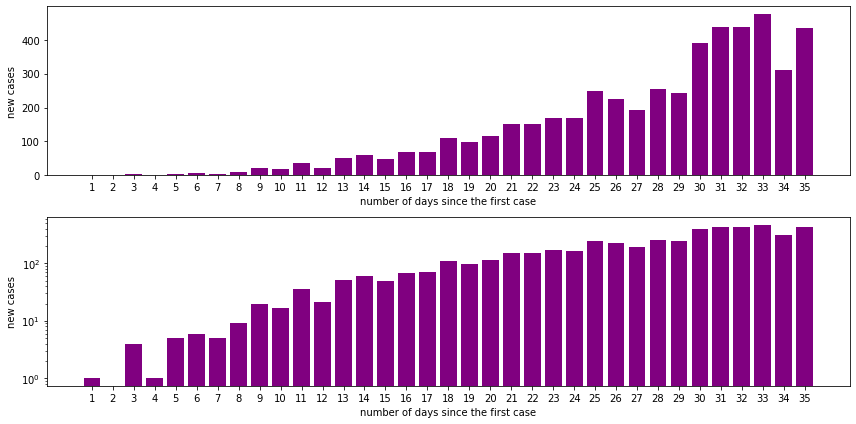

In [9]:
w = 0.8

fig, axs = plt.subplots( nrows =2, figsize=(12,6))

rects = axs[0].bar( day_poland, delta_poland, width= w, label='new cases', color = 'Purple')
rects_log = axs[1].bar( day_poland, delta_poland, width= w, label='new cases', color = 'Purple', log=True)

for ax in axs:
    ax.set_xlabel('number of days since the first case')
    ax.set_ylabel('new cases')
    ax.set_xticks(day_poland)

fig.tight_layout()
plt.show()

In [10]:
popt, pcov =scipy.optimize.curve_fit(func_geometric,  day_poland[:],  delta_poland[:])
perr = np.sqrt(np.diag(pcov))

print("y = a x^n, a= {:2f} +- {:2f} n = {:2f} +- {:2f}".format( popt[0], perr[0],  popt[1], perr[1] )  )

y = a x^n, a= 0.102614 +- 0.063702 n = 2.368253 +- 0.182630


In [11]:
poland_parameters_geometric = scipy.optimize.curve_fit(func_geometric,  day_poland,  delta_poland)[0]
a = poland_parameters_geometric[0]
n = poland_parameters_geometric[1]
n

2.3682531641698144

In [12]:
xx = np.linspace(30,40,11).astype(int)
yy = func_geometric(xx,a,n)
yy

array([323.1486223 , 349.24264901, 376.51425381, 404.97728667,
       434.64532674, 465.53169552, 497.64946922, 531.01149   ,
       565.63037658, 601.51853396, 638.68816253])

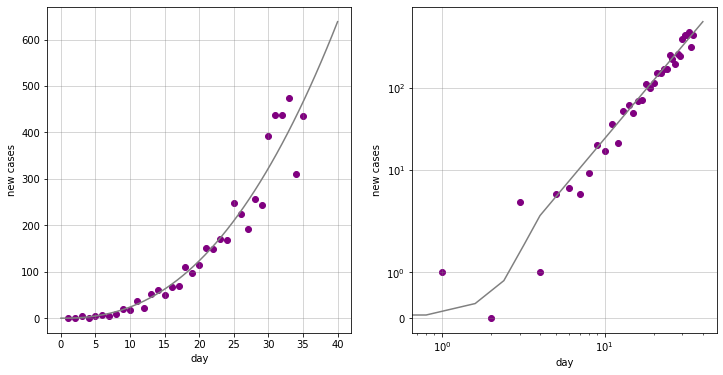

In [13]:
x = np.linspace(0,40,51)
y_geometric = func_geometric(x,a,n)

fig, axs = plt.subplots( ncols =2, figsize=(12,6))

for ax in axs:
    ax.scatter(day_poland, delta_poland, color = 'purple')
    ax.plot(x,y_geometric, color = 'gray')
    ax.set_xlabel('day')
    ax.set_ylabel('new cases')
    ax.grid(color = 'gray', alpha = 0.4)
    
axs[1].set_yscale('symlog')  #"linear", "log", "symlog", "logit", ...}
axs[1].set_xscale('log') 


In [14]:
STOOP

NameError: name 'STOOP' is not defined

In [ ]:
italy_parameters_expo = scipy.optimize.curve_fit(func_expo,  day_italy,  deaths_italy)[0]
italy_parameters_logistic = scipy.optimize.curve_fit(func_logistic,  day_italy,  deaths_italy, method = 'trf', absolute_sigma=False)
italy_parameters_logistic


In [ ]:
x = np.linspace(0,60,101)
max_y = 5500

a = italy_parameters_expo[0]
b = italy_parameters_expo[1]
y_expo = func_expo(x, a, b)

x0 = italy_parameters_logistic[0]
k = italy_parameters_logistic[1]
V = italy_parameters_logistic[2]
y_logistic = func_logistic(x,x0,k,V)

fig, axs = plt.subplots(ncols=2, figsize = (15,4))


axs[0].scatter(day_italy, deaths_italy, label="data points", color = "purple")
axs[0].plot(x, y_expo, label="exponential fit", color = 'gray')

axs[1].scatter(day_italy, deaths_italy, label="data points", color = "purple")
axs[1].plot(x, y_logistic, label="logistic function fit", color = 'gray')
axs[1].axhline(y=V, color='black', linestyle = '--')

for ax in axs:
    ax.set_xlabel('day')
    ax.set_ylabel('number of infected')
    ax.set_ylim(0,max_y) 
    ax.legend()
    ax.grid(color = 'gray', alpha = 0.4)

plt.show()